In [200]:
%matplotlib inline
import pandas as pd
pd.set_option('float_format', '{:.2f}'.format)

In [2]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pyxirr import xirr

In [301]:
df_all = pd.read_csv("data_in_csv.csv", index_col=0, parse_dates=True)

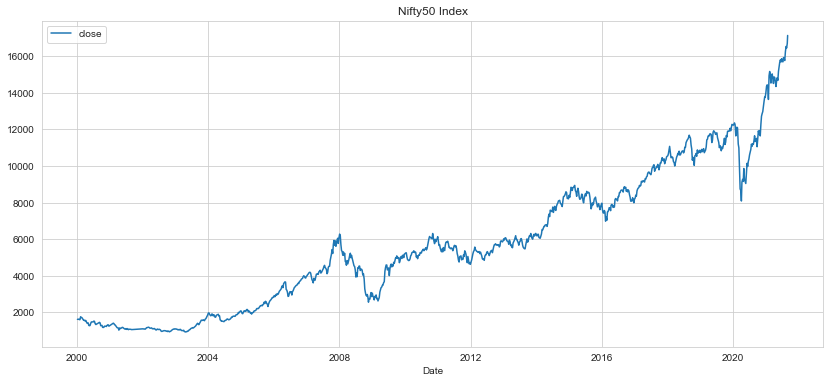

In [304]:
plt.figure(figsize=(14,6))
plt.title("Nifty50 Index")

sns.lineplot(data=df_all)
sns.set_style("whitegrid")

In [305]:
df_all = df_all.rename(columns = {"Close": "close"})
df = df_all.copy(deep=True).loc[:"2020"]
df

,close
Date,
2000-01-07,1613.30
2000-01-14,1622.75
2000-01-21,1620.60
2000-01-28,1599.10
2000-02-04,1599.75
...,...
2020-11-27,12968.95
2020-12-04,13258.55
2020-12-11,13513.85


In [306]:
def cashflow_df(dfi, freq=1, rate = 7):
    mf = 1 + (rate/100)/freq
    #print("mf={}".format(mf))
    dfi["mf"] = mf
    dfi.loc[dfi.index[0], "mf"] = 1200000/freq
    dfi["investment"] = dfi["mf"].cumprod()
    dfi["units"] = dfi["investment"]/dfi["close"]
    #print(dfi)
    #dfi["units"].round(0)
    last_day = df_all.index[-1]
    last_day_close = df_all.close[last_day]
    total_units = dfi.units.sum()
    total_value = last_day_close * total_units
    df_xirr = dfi["investment"] * -1
    df_xirr.loc[last_day] = total_value
    return df_xirr

In [307]:
df["year"] = df.index.year
df_max = df.loc[df.groupby("year").close.idxmax()]

df_first = df.loc[df.groupby("year").close.apply(lambda rows: rows.index[0])]

df_last = df.loc[df.groupby("year").close.apply(lambda rows: rows.index[-1])]

df_min = df.loc[df.groupby("year").close.apply(lambda rows: rows.idxmin())]

In [308]:
num_years = df.year.unique().size
first_day_investment = 1200000 * num_years

first_day = pd.to_datetime("2004-06-25")
df_one_day = df_all.loc[(df_all.index == first_day) | (df_all.index == df_all.index[-1])]
df_one_day.iloc[0, 0] = df_one_day.iloc[0, 0] * -1

first_day_close = -1 * df_one_day.iloc[0, 0]
units = first_day_investment/first_day_close
last_day_close = df_one_day.iloc[1, 0]
total_value_one_day = units * last_day_close

print(df_one_day)
xirr(df_one_day["close"])

              close
Date               
2004-06-25 -1488.51
2021-08-31 17132.20


/Users/vb/dev/python/notebooks/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/vb/dev/python/notebooks/venv/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


0.1526813698511233

In [309]:
df["month_year"] = df.index.map(lambda i: i.year * 100 + i.month)

dfm_max = df.loc[df.groupby("month_year").close.idxmax()]

dfm_first = df.loc[df.groupby("month_year").close.apply(lambda rows: rows.index[0])]

dfm_last = df.loc[df.groupby("month_year").close.apply(lambda rows: rows.index[-1])]

dfm_min = df.loc[df.groupby("month_year").close.apply(lambda rows: rows.idxmin())]

In [310]:
dfm_max

,close,year,month_year
Date,,,
2000-01-14,1622.75,2000,200001
2000-02-11,1756.00,2000,200002
2000-03-03,1656.00,2000,200003
2000-04-07,1557.15,2000,200004
2000-05-05,1422.40,2000,200005
...,...,...,...
2020-08-28,11647.60,2020,202008
2020-09-18,11504.95,2020,202009
2020-10-23,11930.35,2020,202010


In [311]:
print(xirr(cashflow_df(df_first)))
print(xirr(cashflow_df(df_last)))
print(xirr(cashflow_df(df_max)))
print(xirr(cashflow_df(df_min)))

0.1316875741424009
0.13522629825561291
0.12150803639912103
0.15114861039847302


In [312]:
print(xirr(cashflow_df(dfm_first, freq=12)))
print(xirr(cashflow_df(dfm_last, freq=12)))
print(xirr(cashflow_df(dfm_max, freq=12)))
print(xirr(cashflow_df(dfm_min, freq=12)))

0.13598701294600257
0.1367372442665315
0.1338781608492766
0.13898979846354287


In [297]:
cf_min = cashflow_df(df_min, freq=1, rate=0)
xirr(cf_min)

0.14433280008227622

In [294]:
cf_min

Date
2004-06-25    -1200000.00
2005-04-29    -1320000.00
2006-01-13    -1452000.00
2007-03-16    -1597200.00
2008-11-20    -1756920.00
2009-03-06    -1932612.00
2010-02-11    -2125873.20
2011-12-30    -2338460.52
2012-06-01    -2572306.57
2013-08-23    -2829537.23
2014-02-14    -3112490.95
2015-12-11    -3423740.05
2016-02-12    -3766114.05
2017-01-06    -4142725.46
2018-03-23    -4556998.00
2019-02-15    -5012697.80
2020-04-03    -5513967.58
2021-08-31   162482410.65
Name: investment, dtype: float64

In [295]:
num_years = df.year.unique().size
first_day_investment = 1200000 * num_years * -1
last_day_value = cf_min.iloc[-1]
cf_min2 = pd.Series([first_day_investment, last_day_value], index=[df.index[0], cf_min.index[-1]])
cf_min2

2004-01-02   -20400000.00
2021-08-31   162482410.65
dtype: float64

In [296]:
xirr(cf_min2)

0.12457619643141206

In [278]:
num_years

17

In [ ]:
cf_min.iloc[-1]/total_value_one_day

In [314]:
#924 on 2003-04-25
#1878 on 2004-04-13
start_date = pd.to_datetime("2003-04-25")
end_date = pd.to_datetime("2004-04-13")
xirr(pd.Series([-924, 1878], index=[start_date, end_date]))

1.0777580424841484